# Identifying data outliers and anomalies, comparing data balancing methods and providing evaluation

In [1]:
import pandas as pd
from google.colab import drive
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

## Importing Dataset

In [2]:
entire_data = []
for spdt in ["02","03", "04", "05", "06", "07", "08", "09", "10"]:
    drive.mount('/content/gdrive')
    data = arff.loadarff('gdrive/My Drive/Copy of base_desenv_' + spdt + '.arff')
    sub_df = pd.DataFrame(data[0])
    entire_data.append(sub_df)

    data = arff.loadarff('gdrive/My Drive/Copy of base_validacao_' + spdt + '.arff')
    sub_df = pd.DataFrame(data[0])
    entire_data.append(sub_df)

Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to 

In [3]:
df = pd.concat(entire_data)
df.head()

mcc_cat  mcc_ant_cat  cep_cat  cep_ant_cat  valor_trans_cat  \
0      9.0         22.0      3.0          3.0              6.0   
1     22.0         22.0      3.0          3.0              7.0   
2     22.0         22.0      3.0          3.0              7.0   
3      9.0          0.0      2.0          0.0              4.0   
4     15.0          9.0      2.0          2.0              4.0   

   valor_trans_ant_cat  pos_entry  lim_cred_cat  bandeira_cat  variante_cat  \
0                  6.0        2.0           6.0           2.0           3.0   
1                  7.0        2.0           6.0           2.0           3.0   
2                  7.0        2.0           6.0           2.0           3.0   
3                  1.0        2.0           4.0           2.0           3.0   
4                  4.0        2.0           4.0           2.0           3.0   

   score_cat  tp_pessoa_cat  trans_nacional_cat  qtde_parc_cat  \
0        0.0            1.0                 0.0            1.0   
1        0.0            1.0                 0.0            1.0   
2        3.0            1.0                 0.0            1.0   
3        0.0            1.0                 0.0            1.0   
4        0.0            1.0                 0.0            1.0   

   velocidade_cat  dif_score_cat  trans_limit_cat flag_fraude_cat  
0             7.0            1.0              0.0            b'N'  
1             4.0            4.0              0.0            b'N'  
2             6.0            5.0              0.0            b'S'  
3             2.0            3.0              0.0            b'N'  
4             3.0            3.0              0.0            b'N'

## EDA:

In [4]:
df.head()

mcc_cat  mcc_ant_cat  cep_cat  cep_ant_cat  valor_trans_cat  \
0      9.0         22.0      3.0          3.0              6.0   
1     22.0         22.0      3.0          3.0              7.0   
2     22.0         22.0      3.0          3.0              7.0   
3      9.0          0.0      2.0          0.0              4.0   
4     15.0          9.0      2.0          2.0              4.0   

   valor_trans_ant_cat  pos_entry  lim_cred_cat  bandeira_cat  variante_cat  \
0                  6.0        2.0           6.0           2.0           3.0   
1                  7.0        2.0           6.0           2.0           3.0   
2                  7.0        2.0           6.0           2.0           3.0   
3                  1.0        2.0           4.0           2.0           3.0   
4                  4.0        2.0           4.0           2.0           3.0   

   score_cat  tp_pessoa_cat  trans_nacional_cat  qtde_parc_cat  \
0        0.0            1.0                 0.0            1.0   
1        0.0            1.0                 0.0            1.0   
2        3.0            1.0                 0.0            1.0   
3        0.0            1.0                 0.0            1.0   
4        0.0            1.0                 0.0            1.0   

   velocidade_cat  dif_score_cat  trans_limit_cat flag_fraude_cat  
0             7.0            1.0              0.0            b'N'  
1             4.0            4.0              0.0            b'N'  
2             6.0            5.0              0.0            b'S'  
3             2.0            3.0              0.0            b'N'  
4             3.0            3.0              0.0            b'N'

In [ ]:
df.tail()

mcc_cat  mcc_ant_cat  cep_cat  cep_ant_cat  valor_trans_cat  \
12654      8.0         15.0      6.0          6.0              6.0   
12655      6.0          6.0      1.0          1.0              2.0   
12656      3.0          0.0      5.0          0.0              4.0   
12657      7.0          0.0      2.0          0.0              2.0   
12658      6.0          6.0      6.0          6.0              3.0   

       valor_trans_ant_cat  pos_entry  lim_cred_cat  bandeira_cat  \
12654                  2.0        2.0           3.0           4.0   
12655                  2.0        2.0           1.0           4.0   
12656                  1.0        2.0           1.0           4.0   
12657                  1.0        1.0           1.0           4.0   
12658                  4.0        2.0           1.0           4.0   

       variante_cat  score_cat  tp_pessoa_cat  trans_nacional_cat  \
12654           1.0        0.0            1.0                 0.0   
12655           1.0        0.0            1.0                 0.0   
12656           1.0        0.0            1.0                 0.0   
12657           1.0        0.0            1.0                 0.0   
12658           1.0        0.0            1.0                 0.0   

       qtde_parc_cat  velocidade_cat  dif_score_cat  trans_limit_cat  \
12654            1.0             5.0            3.0              0.0   
12655            1.0             5.0            3.0              0.0   
12656            2.0             2.0            3.0              0.0   
12657            1.0             2.0            3.0              0.0   
12658            1.0             7.0            3.0              0.0   

      flag_fraude_cat  
12654            b'N'  
12655            b'N'  
12656            b'N'  
12657            b'N'  
12658            b'N'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374823 entries, 0 to 12658
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   mcc_cat              374823 non-null  float64
 1   mcc_ant_cat          374823 non-null  float64
 2   cep_cat              374823 non-null  float64
 3   cep_ant_cat          374823 non-null  float64
 4   valor_trans_cat      374823 non-null  float64
 5   valor_trans_ant_cat  374823 non-null  float64
 6   pos_entry            374823 non-null  float64
 7   lim_cred_cat         374823 non-null  float64
 8   bandeira_cat         374823 non-null  float64
 9   variante_cat         374823 non-null  float64
 10  score_cat            374823 non-null  float64
 11  tp_pessoa_cat        374823 non-null  float64
 12  trans_nacional_cat   374823 non-null  float64
 13  qtde_parc_cat        374823 non-null  float64
 14  velocidade_cat       374823 non-null  float64
 15  dif_score_cat     

In [ ]:
df.describe()

mcc_cat    mcc_ant_cat        cep_cat    cep_ant_cat  \
count  374823.000000  374823.000000  374823.000000  374823.000000   
mean       10.903594       6.631066       3.903498       2.287608   
std         6.264215       7.300236       2.441054       2.648531   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       0.000000       2.000000       0.000000   
50%         9.000000       6.000000       4.000000       1.000000   
75%        15.000000      12.000000       6.000000       4.000000   
max        32.000000      32.000000       9.000000       9.000000   

       valor_trans_cat  valor_trans_ant_cat      pos_entry   lim_cred_cat  \
count    374823.000000        374823.000000  374823.000000  374823.000000   
mean          4.992148             3.362643       3.834394       5.897376   
std           2.434372             2.712998       3.159801       2.430863   
min           1.000000             1.000000       0.000000       1.000000   
25%           3.000000             1.000000       2.000000       4.000000   
50%           5.000000             2.000000       2.000000       6.000000   
75%           7.000000             5.000000       9.000000       8.000000   
max           9.000000             9.000000       9.000000       9.000000   

        bandeira_cat   variante_cat      score_cat  tp_pessoa_cat  \
count  374823.000000  374823.000000  374823.000000  374823.000000   
mean        2.348597       2.015295       0.627632       0.983144   
std         1.717701       0.835288       1.699094       0.128732   
min         1.000000       1.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       1.000000   
50%         1.000000       2.000000       0.000000       1.000000   
75%         5.000000       3.000000       0.000000       1.000000   
max         5.000000       5.000000       9.000000       1.000000   

       trans_nacional_cat  qtde_parc_cat  velocidade_cat  dif_score_cat  \
count       374823.000000  374823.000000   374823.000000  374823.000000   
mean             0.004898       1.210195        3.365092       2.933561   
std              0.069816       0.466723        1.706867       0.984662   
min              0.000000       1.000000        1.000000       1.000000   
25%              0.000000       1.000000        2.000000       3.000000   
50%              0.000000       1.000000        2.000000       3.000000   
75%              0.000000       1.000000        5.000000       3.000000   
max              1.000000       3.000000        7.000000       5.000000   

       trans_limit_cat  
count    374823.000000  
mean          0.069945  
std           0.399692  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           9.000000

In [5]:
print(df['flag_fraude_cat'].value_counts())


b'N'    360792
b'S'     14031
Name: flag_fraude_cat, dtype: int64


In [ ]:
df.shape

(374823, 18)

## Visualization

<ipython-input-7-bd7f0bbe7e7a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='flag_fraude_cat', data=df, ax=axes[1], palette='pastel', inner='quartile')


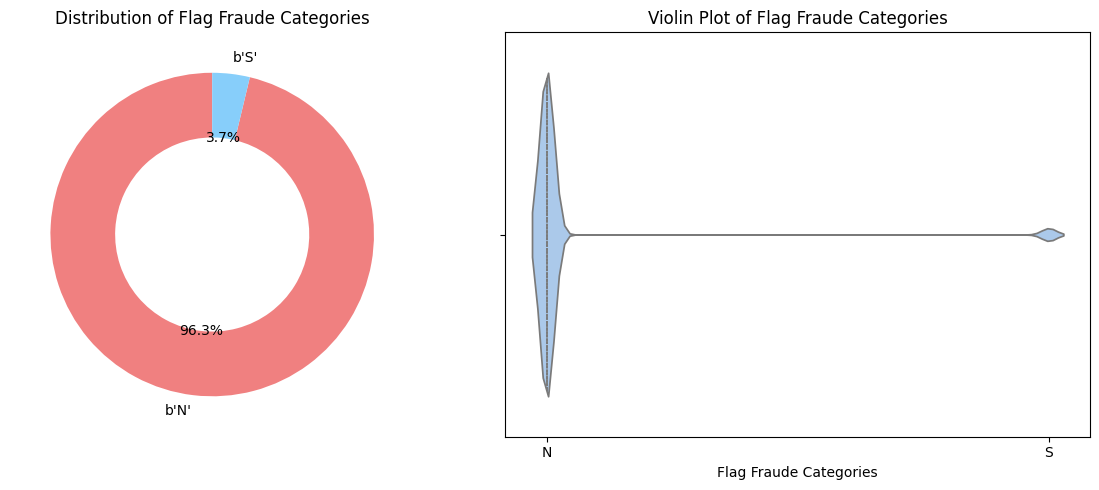

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Pie Chart for Categorical Data
fraud_counts = df['flag_fraude_cat'].value_counts()
axes[0].pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'], wedgeprops=dict(width=0.4))
axes[0].add_artist(plt.Circle((0, 0), 0.3, fc='white'))  # Add a white circle to create a donut plot
axes[0].set_title('Distribution of Flag Fraude Categories')

# Violin Plot for Categorical Data
sns.violinplot(x='flag_fraude_cat', data=df, ax=axes[1], palette='pastel', inner='quartile')
axes[1].set_title('Violin Plot of Flag Fraude Categories')
axes[1].set_xlabel('Flag Fraude Categories')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


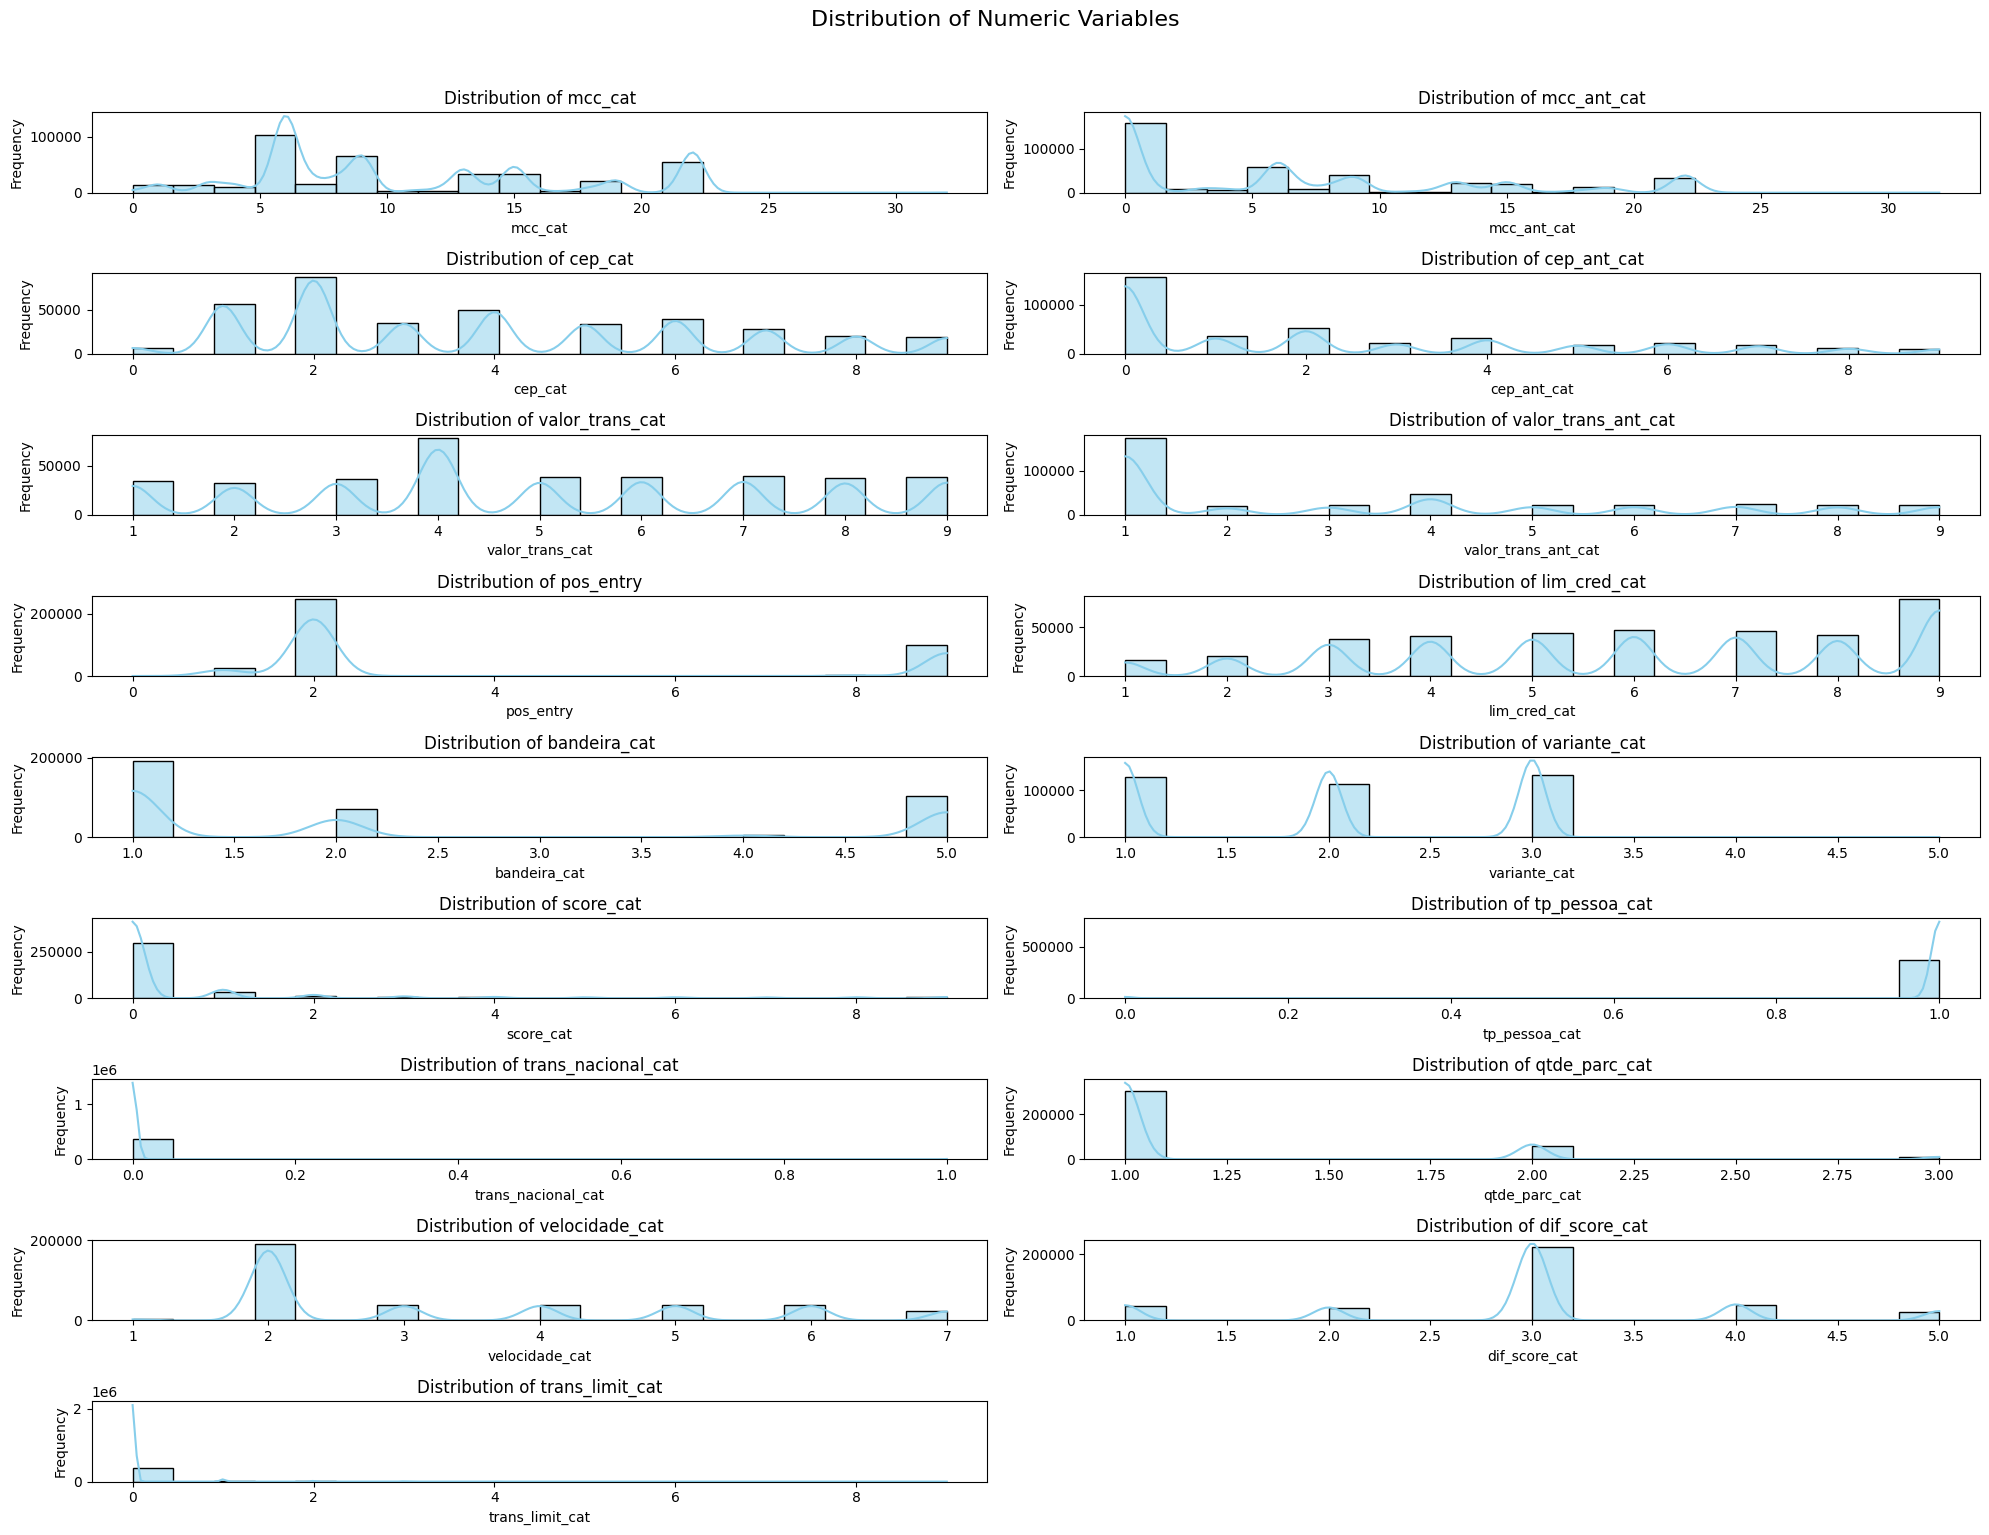

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Calculate the number of rows and columns needed for subplots
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / 2)
num_cols = min(2, num_plots)

# Set up subplots for numeric variables
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))
fig.suptitle('Distribution of Numeric Variables', y=1.02, fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot histograms for numeric variables
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if the number of plots is odd
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


## Preprocessing

Creating test and train datasets

In [9]:
y= df['flag_fraude_cat'].map({b'N': 0, b'S': 1})
df.drop('flag_fraude_cat', axis=1, inplace=True)
y

0        0
1        0
2        1
3        0
4        0
        ..
12654    0
12655    0
12656    0
12657    0
12658    0
Name: flag_fraude_cat, Length: 374823, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)
X_train.reset_index(drop=True, inplace = True)
X_test.reset_index(drop=True, inplace = True)

Normalizing

In [11]:
learn_scaler=StandardScaler().fit(X_train)
X_train_normal = learn_scaler.transform(X_train)
X_test_normal = learn_scaler.transform(X_test)

## Visualization after PCA

In [12]:
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Create PCA Instance
pca = PCA()

# Step 2: Fit and Transform Data
data_pca = pca.fit_transform(X_train_normal)

# Step 3: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Cumulative Sum of Explained Variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Step 5: Copy of Reduced Data
reduced_data = np.copy(data_pca)

# Step 6: Print Shape of Reduced Data
print("Shape of Reduced Data:", reduced_data.shape)


Shape of Reduced Data: (299858, 17)


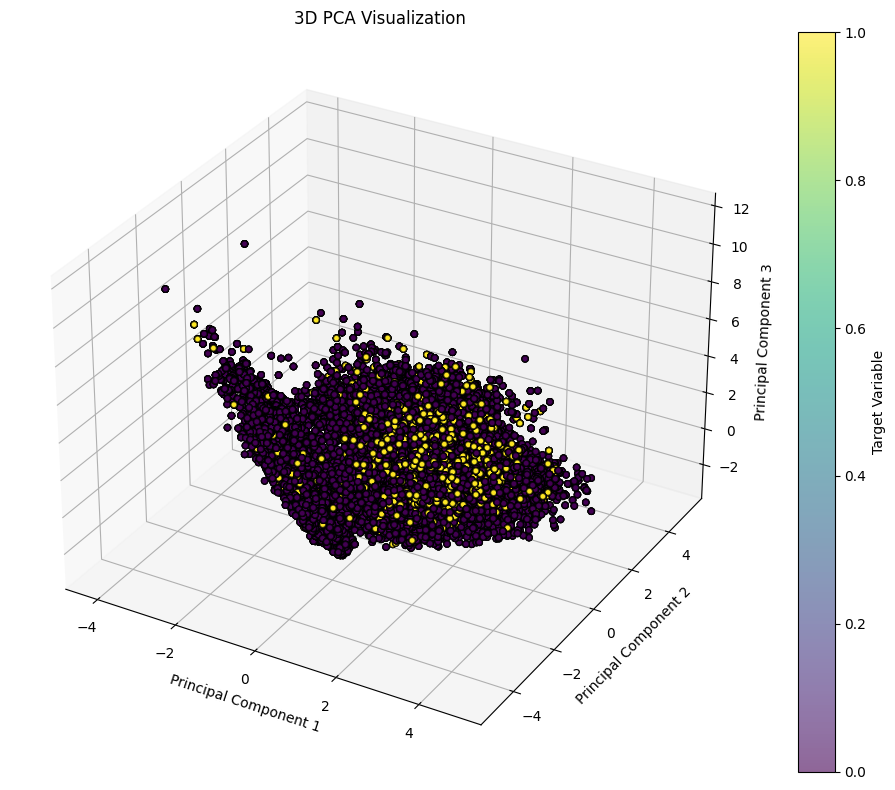

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with improved markers and labels
scatter = ax.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    reduced_data[:, 2],
    c=y_train,
    cmap="viridis",
    marker='o',  # Adjust marker style if needed
    edgecolors='k',  # Add black edges for better visibility
    alpha=0.6
)

# Add a color bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Target Variable')

# Set axis labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization')

# Improve grid visibility
ax.grid(True, linestyle='dotted', linewidth=0.5, alpha=0.6)

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


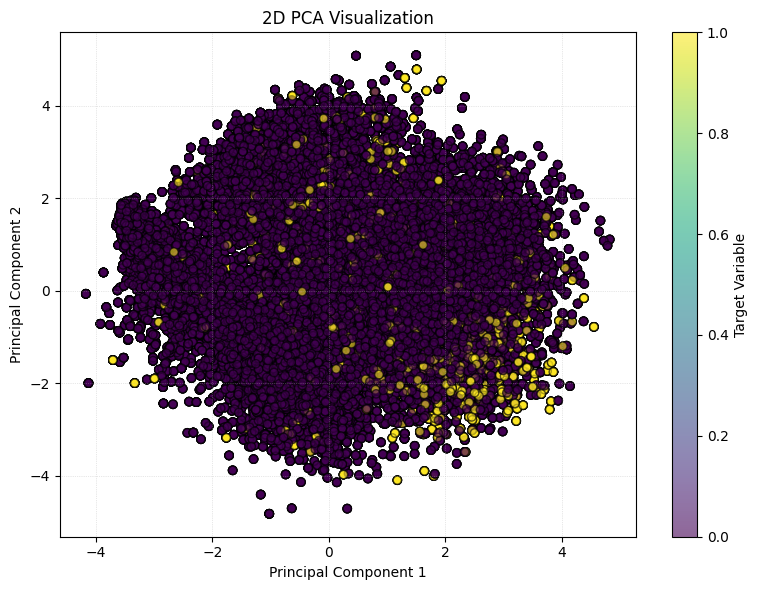

In [14]:
import matplotlib.pyplot as plt

# Create a 2D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

# Scatter plot with improved markers and labels
scatter = ax.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    c=y_train,
    cmap="viridis",
    marker='o',  # Adjust marker style if needed
    edgecolors='k',  # Add black edges for better visibility
    alpha=0.6
)

# Add a color bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Target Variable')

# Set axis labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA Visualization')

# Improve grid visibility
ax.grid(True, linestyle='dotted', linewidth=0.5, alpha=0.6)

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


## Visualization after t-SNE

In [39]:
from sklearn.manifold import TSNE
TSNE_3D_embedding = TSNE(n_components=3, learning_rate='auto', init='random')
embedded_3d_data = TSNE_3D_embedding.fit_transform(X_train_normal)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedded_3d_data[:,0], embedded_3d_data[:,1], embedded_3d_data[:,2], c=y_train, cmap="viridis", alpha=0.4)
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.manifold import TSNE
TSNE_2D_embedding = TSNE(n_components=2, learning_rate='auto', init='random')
embedded_2d_data = TSNE_2D_embedding.fit_transform(X_train_normal)

## Finding Outliers

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

def calculate_metrics(y_true, y_pred, is_prob=False, threshold=0.5):
    metrics_list = []

    if is_prob:
        y_predict = (y_pred > threshold).astype(int)
    else:
        y_predict = y_pred

    # Classification metrics
    precision = precision_score(y_true, y_predict, average='macro')
    recall = recall_score(y_true, y_predict, average='macro')
    f1 = f1_score(y_true, y_predict, average='macro')
    accuracy = accuracy_score(y_true, y_predict)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Accuracy: {accuracy}\n")

    metrics_list.extend([precision, recall, f1, accuracy])

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # ROC Curve
    if is_prob:
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        auc_score = auc(fpr, tpr)
        print(f"AUC score: {auc_score}")
        metrics_list.append(auc_score)
        plt.plot(fpr, tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

    # Precision-Recall Curve
    if is_prob:
        precision, recall, _ = precision_recall_curve(y_true, y_pred)
        auc_pr = auc(recall, precision)
        print(f"AUPRC score: {auc_pr}")
        metrics_list.append(auc_pr)
        plt.plot(recall, precision)
        plt.ylabel('Precision')
        plt.xlabel('Recall')
        plt.show()

    return metrics_list


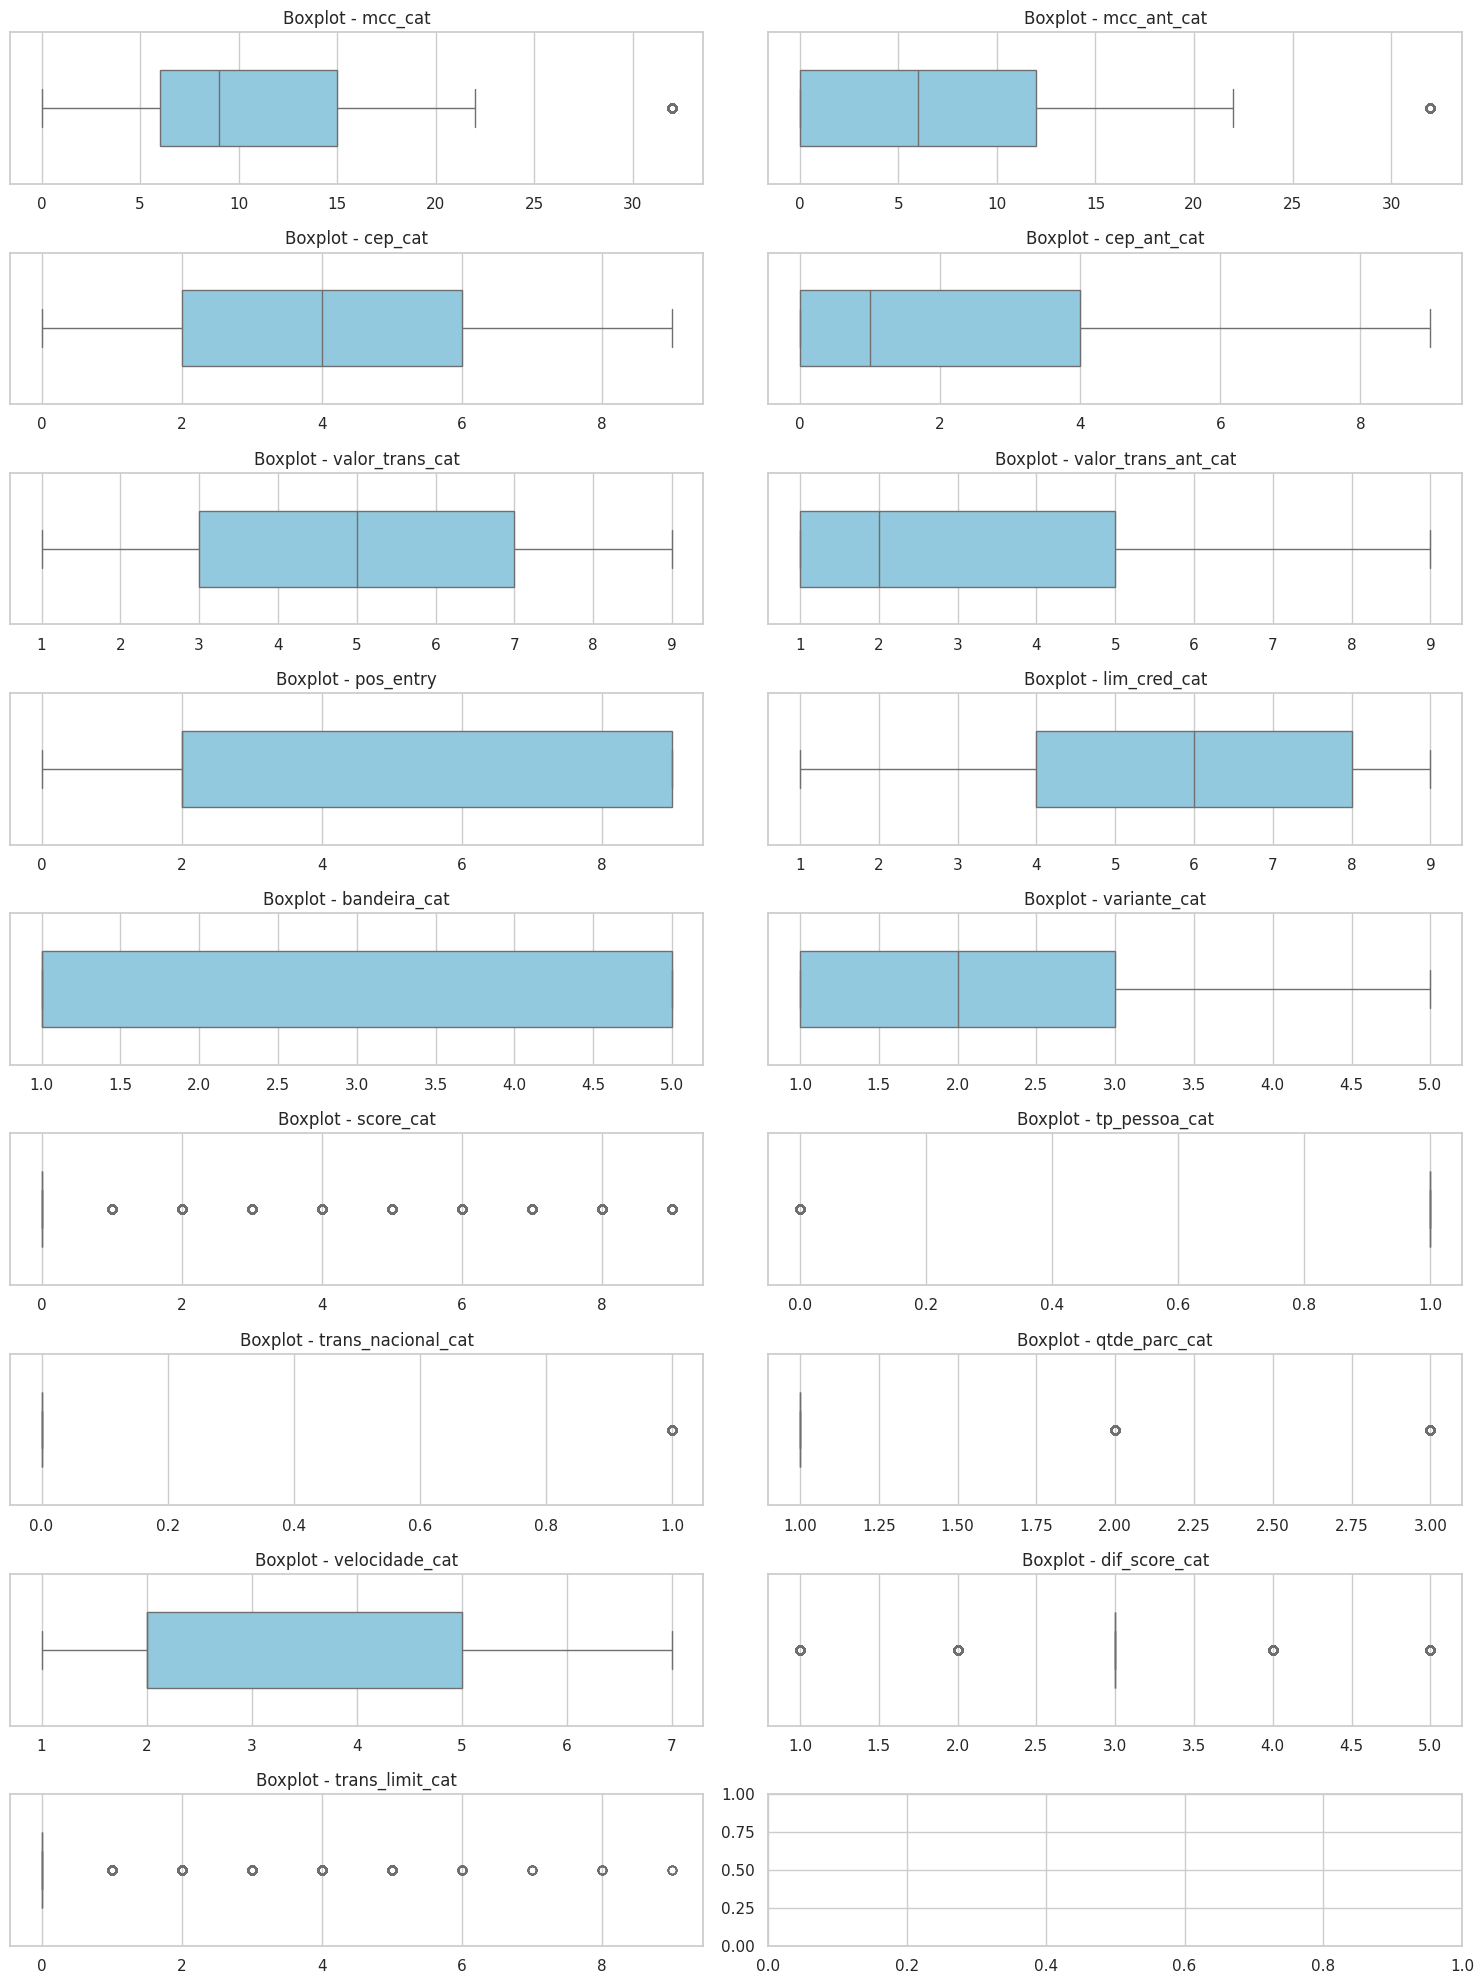

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15, 20))

# Flatten the array of subplots for easy iteration
axes = axes.flatten()

# Loop through each column and create a box plot
for i, column in enumerate(X_train.columns):
    sns.boxplot(x=X_train[column], ax=axes[i], color='skyblue', width=0.5)
    axes[i].set_title(f'Boxplot - {column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


## IQR

<ipython-input-27-5af9df81284c>:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


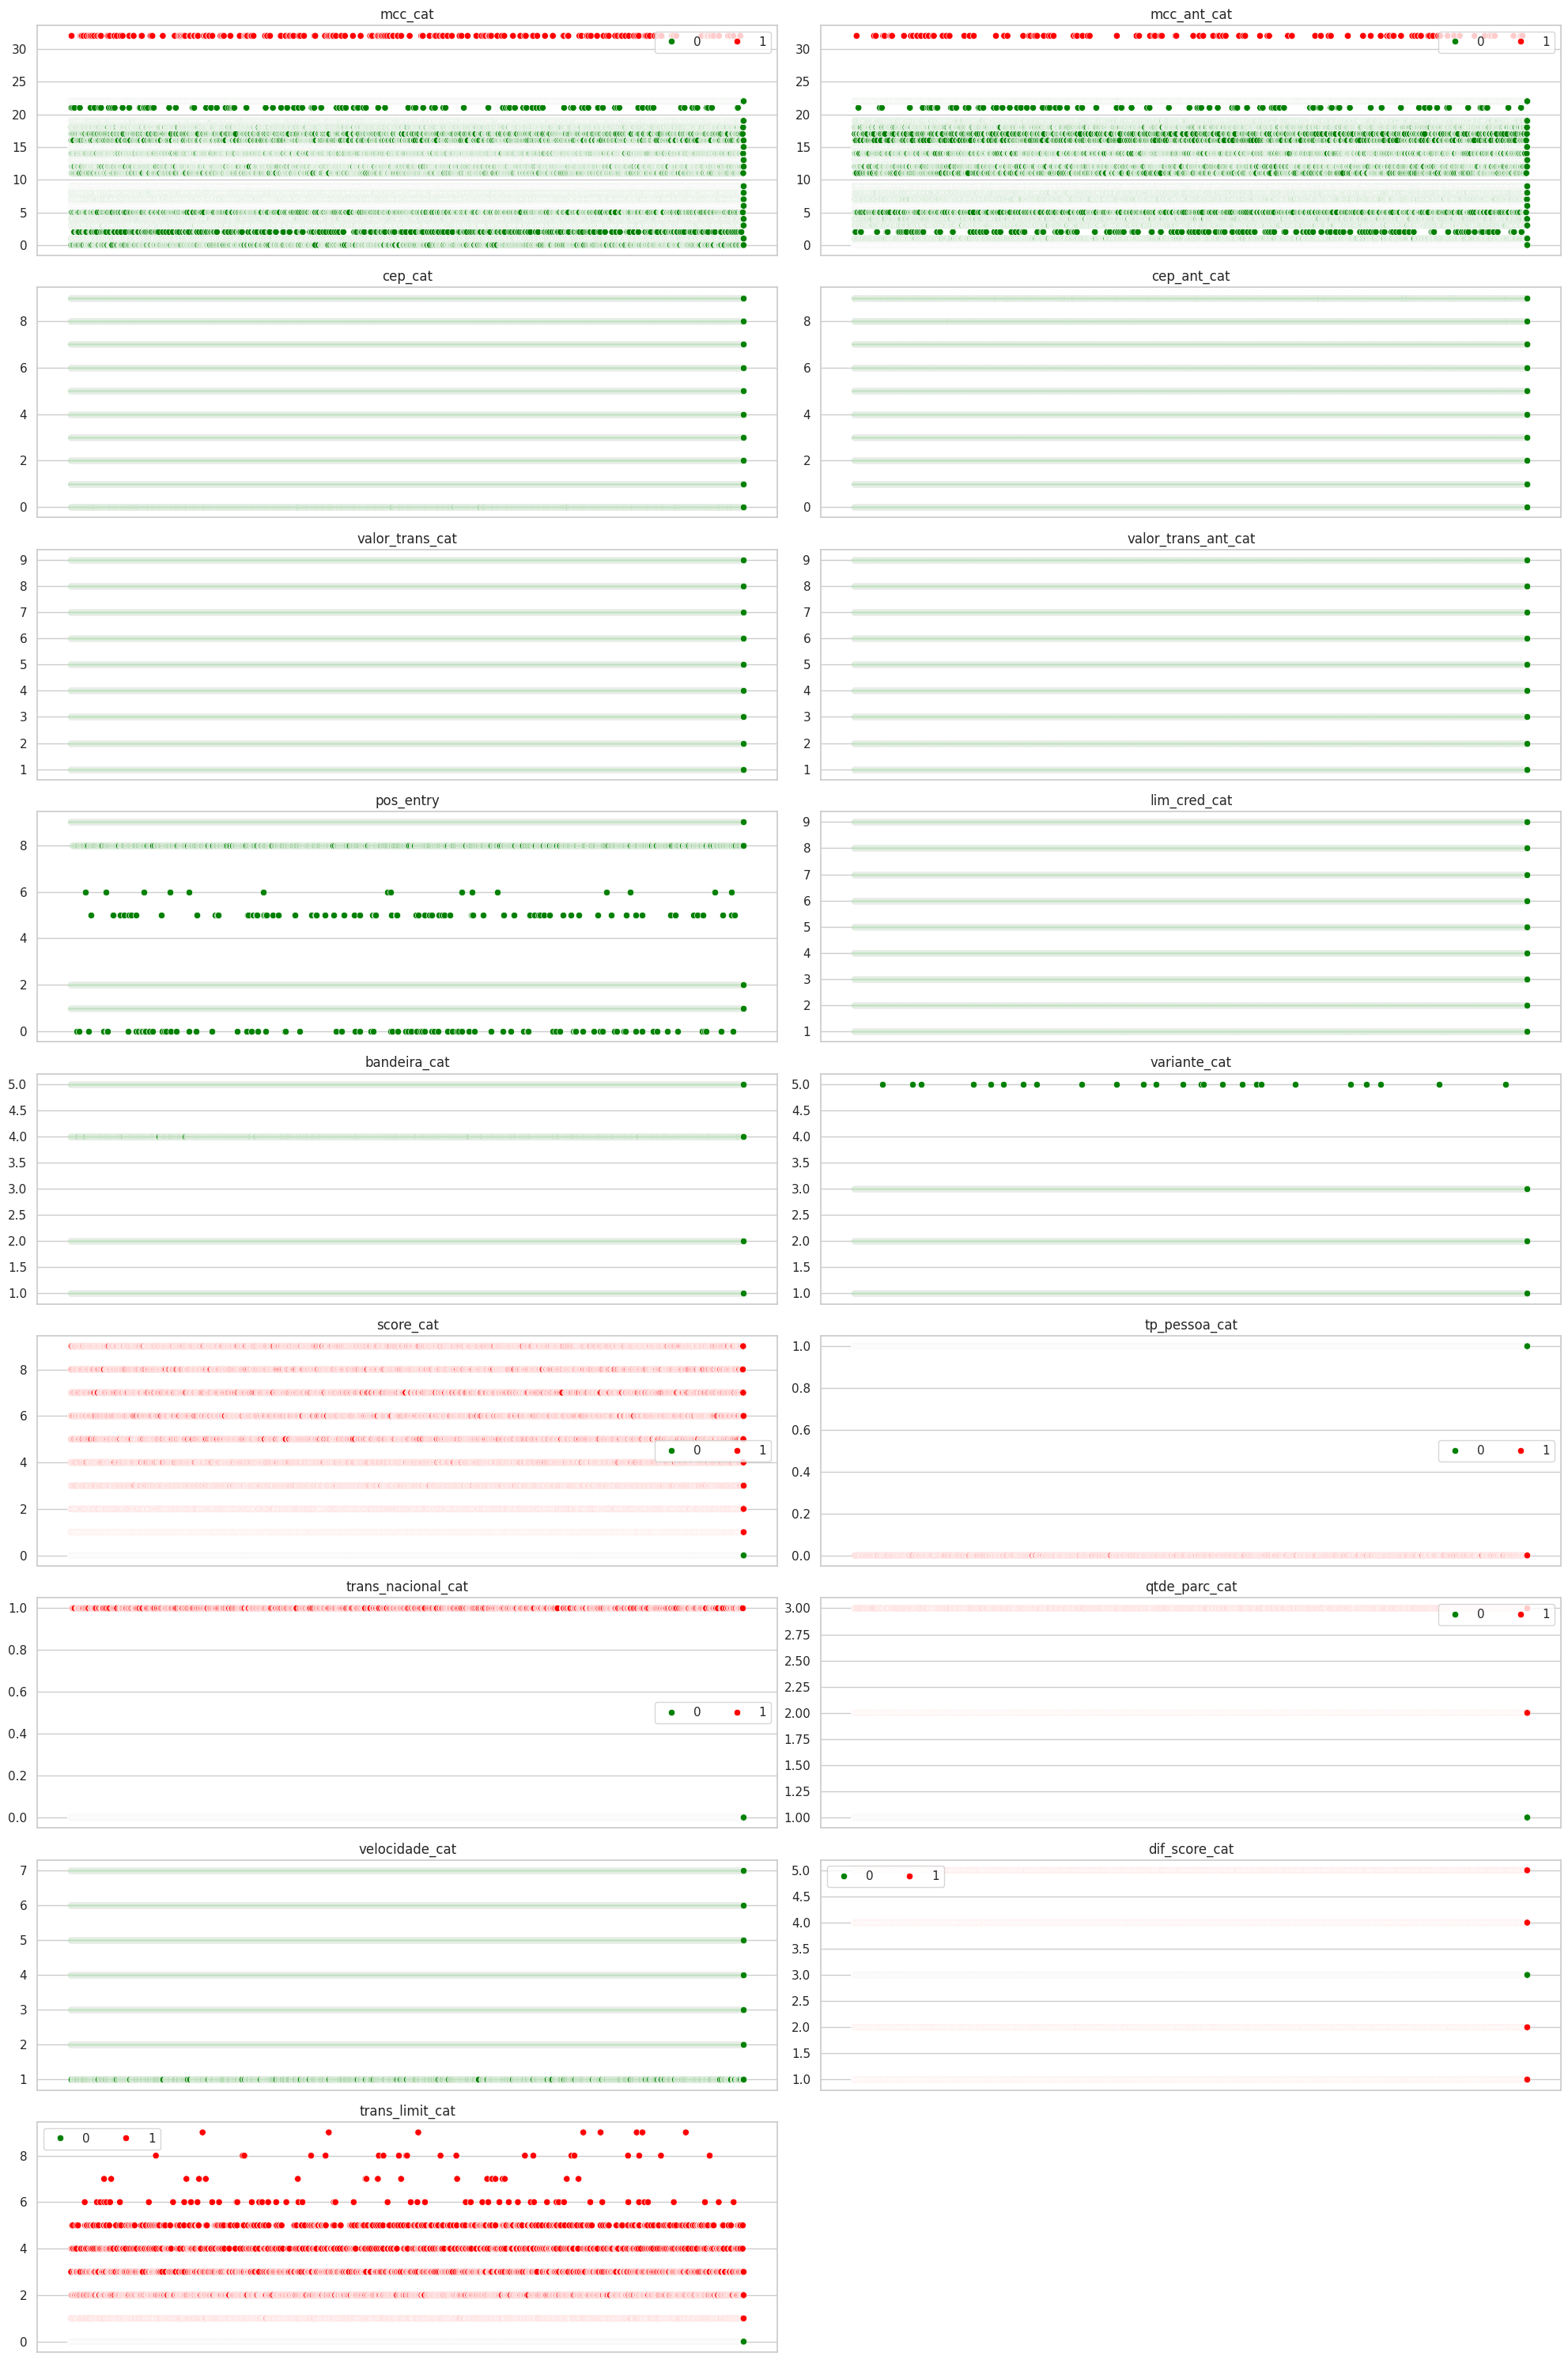

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, ax = plt.subplots(9, 2, figsize=(20, 30))
outliers_data = []
row = col = 0

for n, feature in enumerate(X_train.columns):
    if (n % 2 == 0) and (n > 0):
        row += 1
        col = 0

    # Outlier detection using IQR
    q1 = X_train[feature].quantile(0.25)
    q3 = X_train[feature].quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - 1.5 * iqr
    max_ = q3 + 1.5 * iqr

    outliers = pd.Series([0] * len(X_train[feature]))
    outliers[((X_train[feature] < min_) | (X_train[feature] > max_))] = 1
    outliers_data.extend(outliers.index[outliers == 1].tolist())

    # Plotting scatter plot
    if sum(outliers) == 0:
        sns.scatterplot(x=np.arange(len(X_train[feature])), y=X_train[feature], ax=ax[row, col], legend=False, color='green')
    else:
        sns.scatterplot(x=np.arange(len(X_train[feature])), y=X_train[feature], ax=ax[row, col], hue=outliers, palette=['green', 'red'])

    ax[row, col].set_ylabel("")
    ax[row, col].set_title(feature)
    ax[row, col].xaxis.set_visible(False)

    if sum(outliers) > 0:
        ax[row, col].legend(ncol=2)

    col += 1

# Turn off the last subplot
ax[row, col].axis('off')

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-17-0b4eb9ef9213>:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


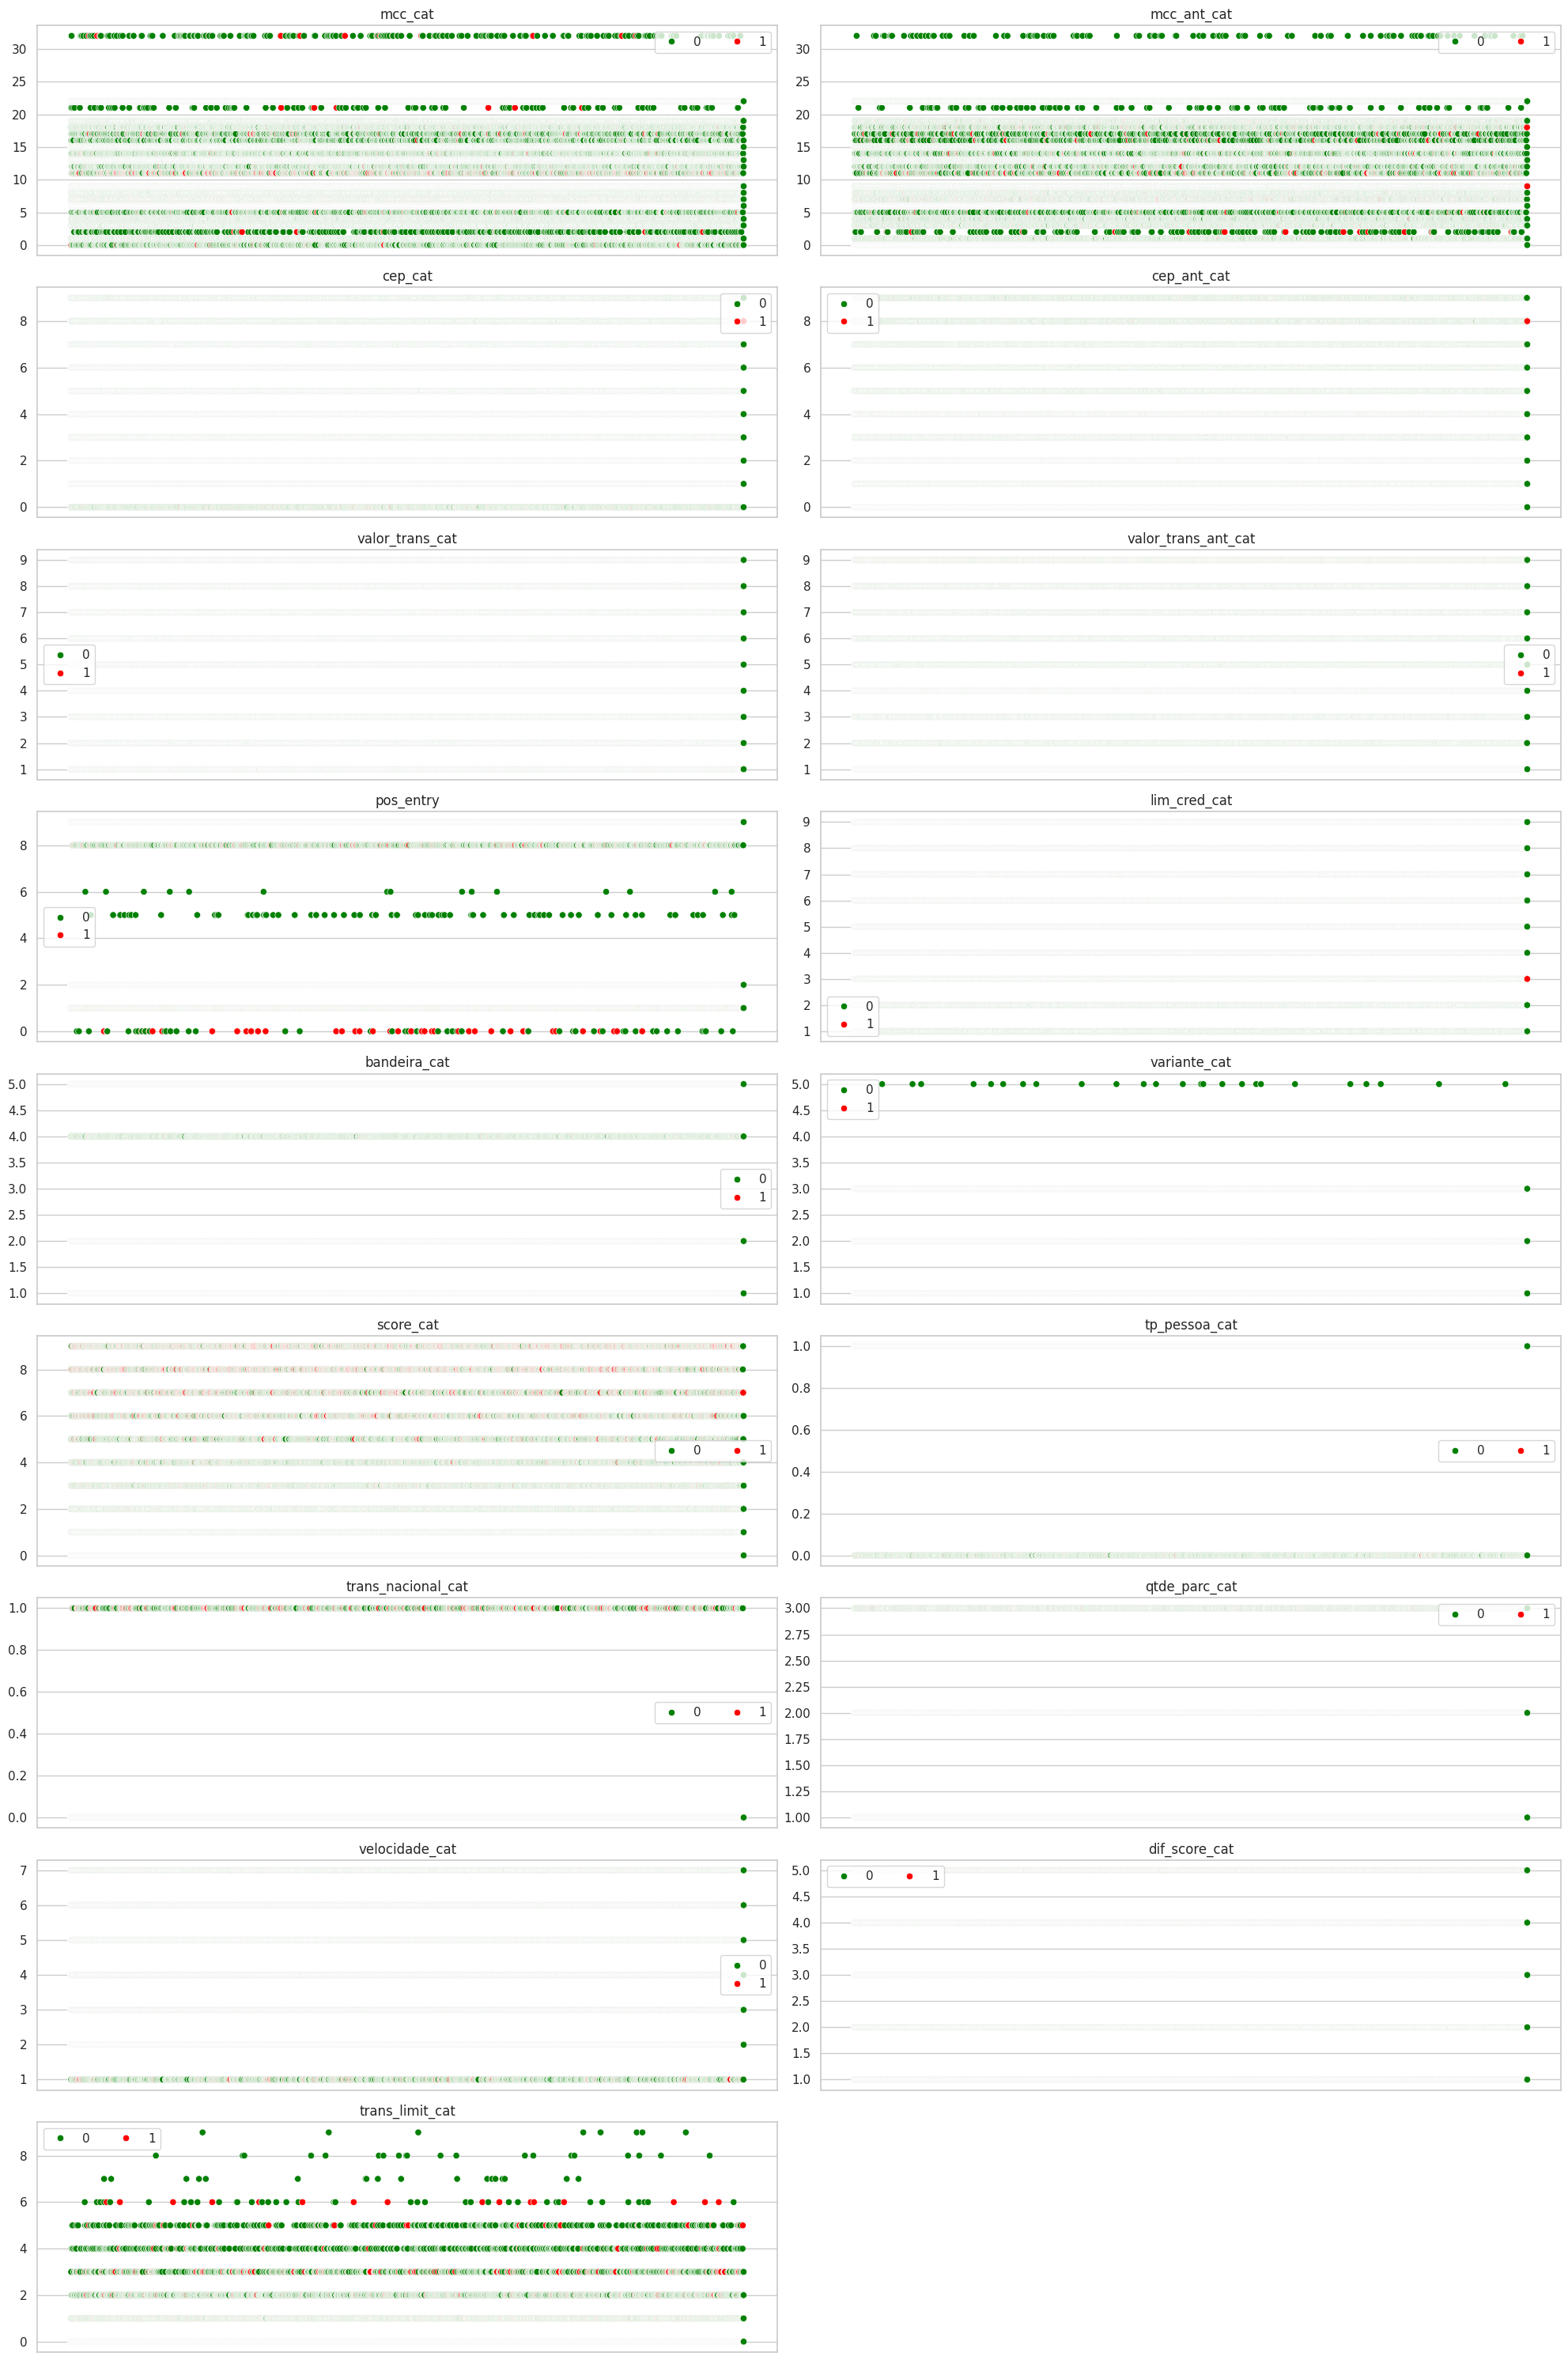

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, ax = plt.subplots(9, 2, figsize=(20, 30))
row = col = 0

for n, feature in enumerate(X_train.columns):
    if (n % 2 == 0) and (n > 0):
        row += 1
        col = 0

    # Outlier detection using IQR
    q1 = X_train[feature].quantile(0.25)
    q3 = X_train[feature].quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - 1.5 * iqr
    max_ = q3 + 1.5 * iqr

    outliers = pd.Series([0] * len(X_train[feature]))
    outliers[((X_train[feature] < min_) | (X_train[feature] > max_))] = 1

    # Plotting scatter plot with hue based on target variable (y_train)
    sns.scatterplot(x=np.arange(len(X_train[feature])), y=X_train[feature], ax=ax[row, col], hue=np.array(y_train), palette=['green', 'red'])
    ax[row, col].set_ylabel("")
    ax[row, col].set_title(feature)
    ax[row, col].xaxis.set_visible(False)

    if sum(outliers) > 0:
        ax[row, col].legend(ncol=2)

    col += 1

# Turn off the last subplot
ax[row, col].axis('off')

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


Precision: 0.5706522761485011
Recall: 0.7063904521225337
F1 Score: 0.591161451376123
Accuracy: 0.8817106763868231



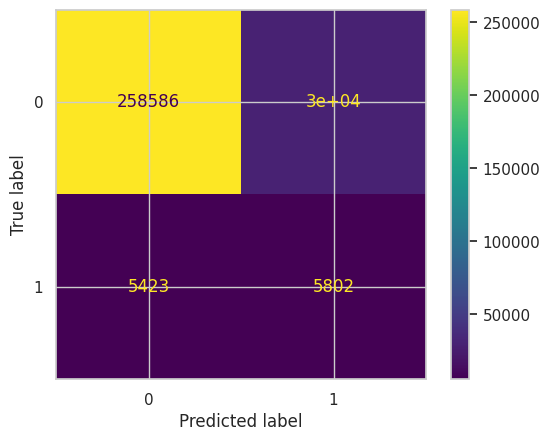

[0.5706522761485011, 0.7063904521225337, 0.591161451376123, 0.8817106763868231]

In [22]:
y_pred = np.zeros_like(y_train)
y_pred[list(set(outliers_data))] = 1
calculate_metrics(y_train, y_pred)

PCA 2D: 


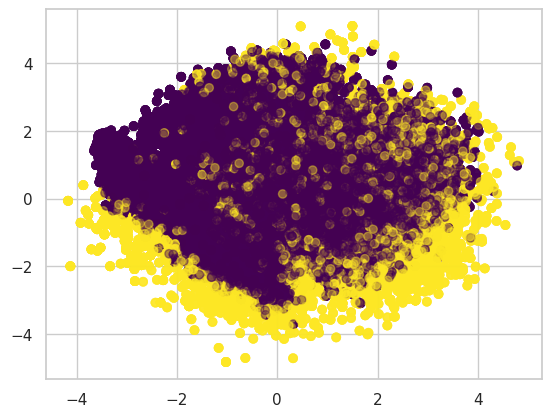

In [25]:
print("PCA 2D: ")
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(reduced_data[:,0], reduced_data[:,1], c=y_pred, cmap="viridis", alpha=0.4)
plt.show()
print()


## Z-Score

<ipython-input-19-09cf9bd2b3e7>:49: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


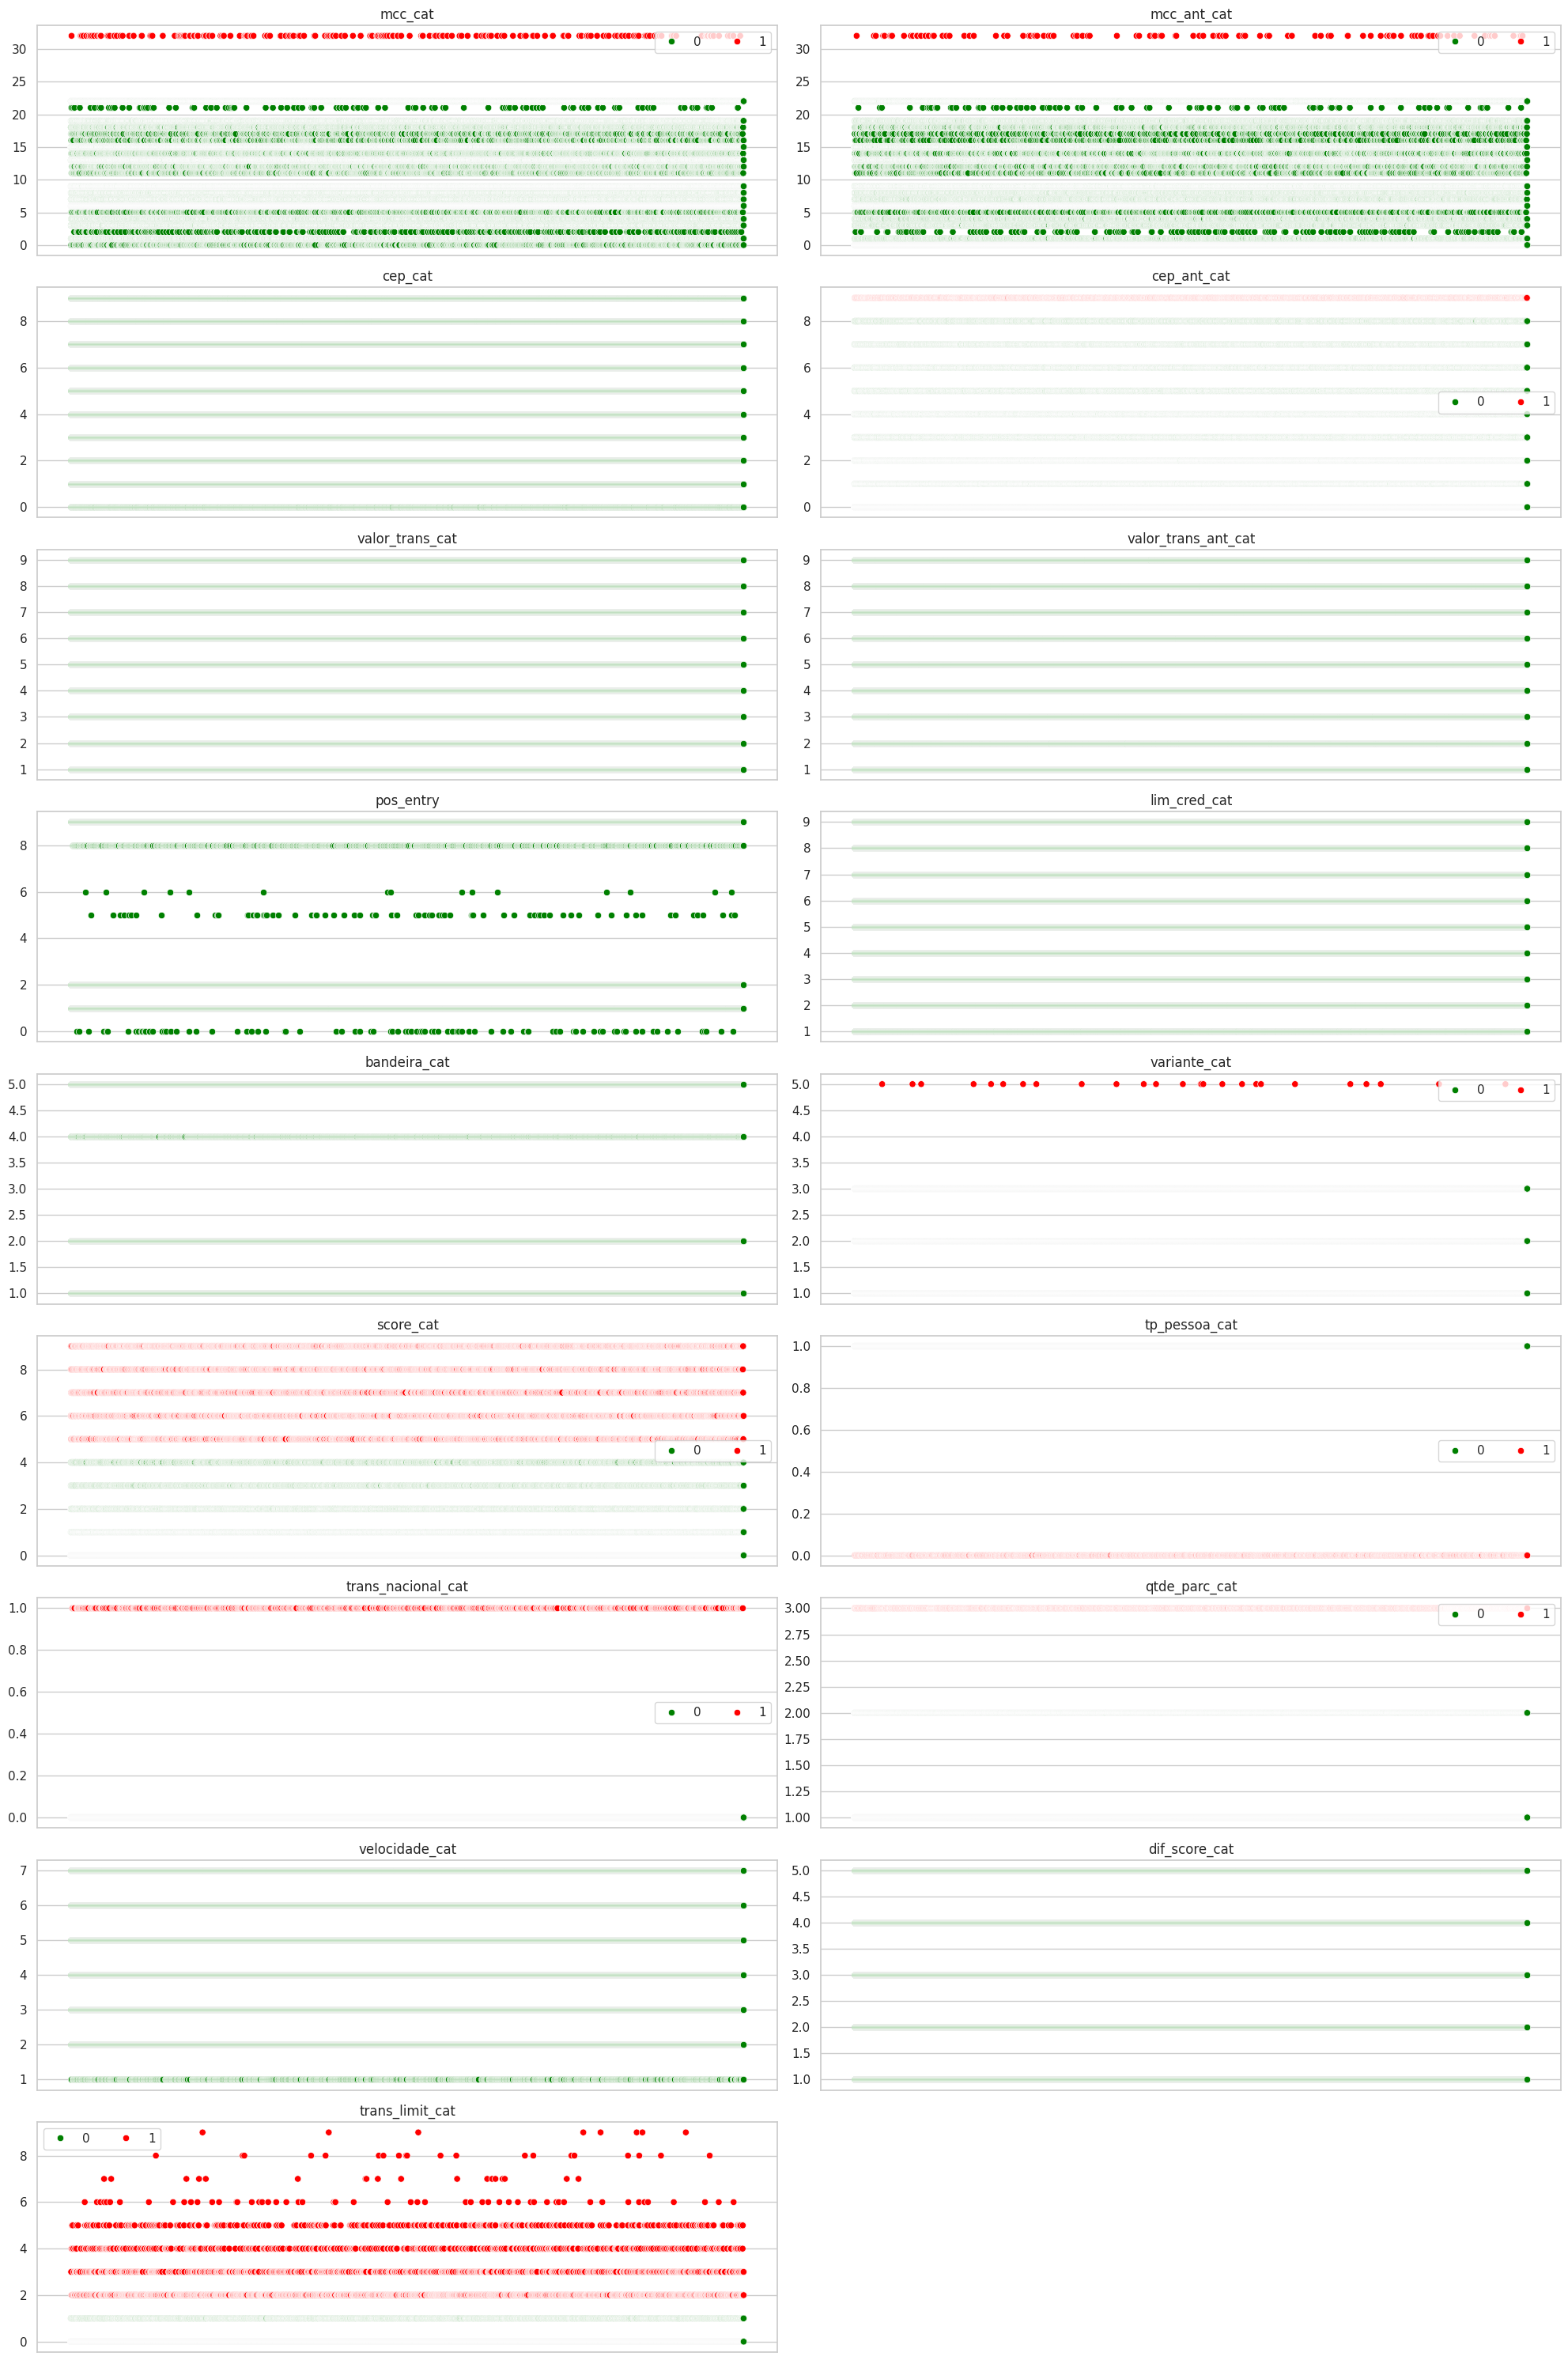

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def zscore_outlier(x, factor):
    mu = x.mean().copy()
    sd = x.std().copy()
    ub = factor
    lb = -factor
    zscore = ((x - mu) / sd)
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_

# Create a figure with subplots
fig, ax = plt.subplots(9, 2, figsize=(20, 30))
outliers_data = []
row = col = 0

for n, feature in enumerate(X_train.columns):
    if (n % 2 == 0) and (n > 0):
        row += 1
        col = 0

    # Z-score outlier detection
    outliers = zscore_outlier(X_train[feature], 2.5)
    outliers_data.extend(outliers.index[outliers == 1].tolist())

    # Plotting scatter plot
    if sum(outliers) == 0:
        sns.scatterplot(x=np.arange(len(X_train[feature])), y=X_train[feature], ax=ax[row, col], legend=False, color='green')
    else:
        sns.scatterplot(x=np.arange(len(X_train[feature])), y=X_train[feature], ax=ax[row, col], hue=outliers, palette=['green', 'red'])

    ax[row, col].set_ylabel("")
    ax[row, col].set_title(feature)
    ax[row, col].xaxis.set_visible(False)

    if sum(outliers) > 0:
        ax[row, col].legend(ncol=2)

    col += 1

# Turn off the last subplot
ax[row, col].axis('off')

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


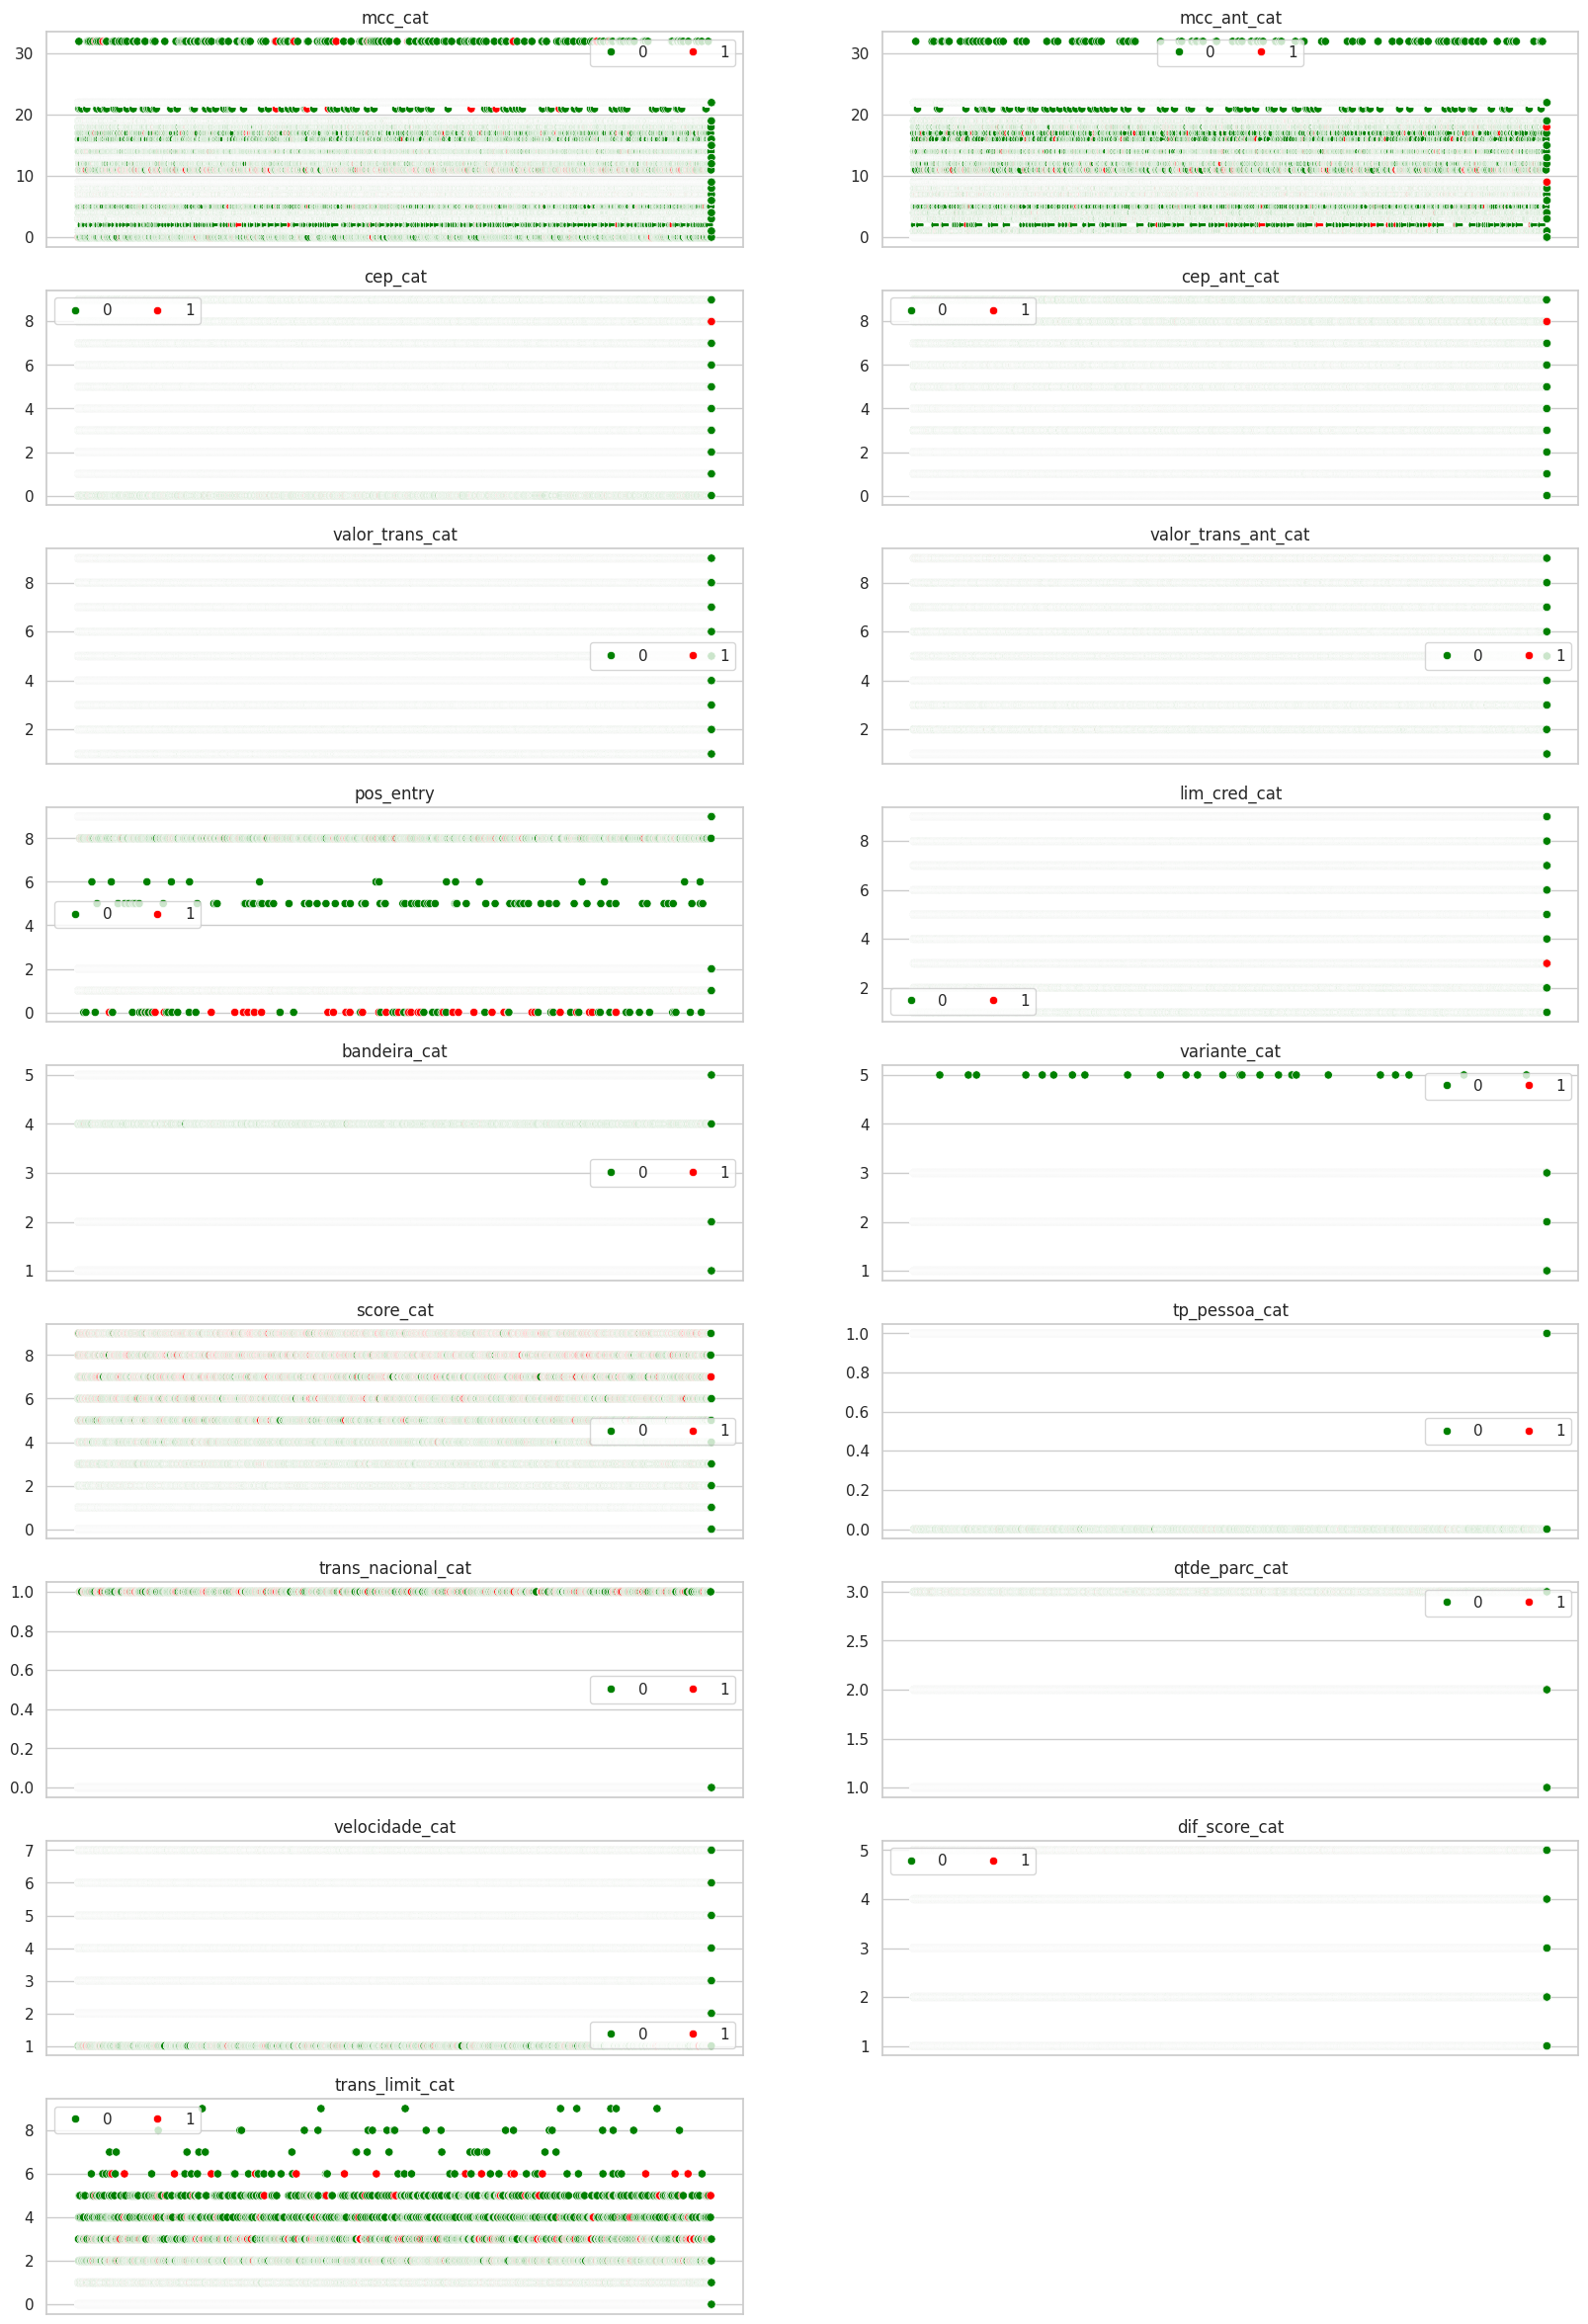

In [20]:
fig, ax = plt.subplots(9, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(X_train.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    sns.scatterplot(x = np.arange(len(X_train[i])), y = X_train[i], ax = ax[row, col], hue = np.array(y_train), palette = ['green','red'])
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

Precision: 0.5706522761485011
Recall: 0.7063904521225337
F1 Score: 0.591161451376123
Accuracy: 0.8817106763868231



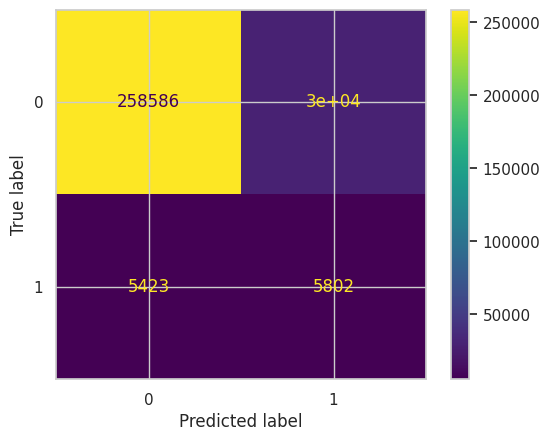

[0.5706522761485011, 0.7063904521225337, 0.591161451376123, 0.8817106763868231]

In [26]:
y_pred = np.zeros_like(y_train)
y_pred[list(set(outliers_data))] = 1
calculate_metrics(y_train, y_pred)

## Anomoly Detection

### One-class SVM

In [28]:
from sklearn.svm import OneClassSVM

# Initialize One-Class SVM anomaly detector
anomaly_detector = OneClassSVM(nu=0.01)

# Fit the model on the training data
anomaly_detector.fit(X_train)

# Generate predictions for anomalies in both training and test sets
train_anomaly_predictions = anomaly_detector.predict(X_train)
test_anomaly_predictions = anomaly_detector.predict(X_test)

# Identify anomalies using the predicted labels
train_anomalies = train_anomaly_predictions == -1
test_anomalies = test_anomaly_predictions == -1

# Print the number of anomalies detected in the training set
print("OneClassSVM anomalies in the training set:", train_anomalies.sum())

# Print the number of anomalies detected in the test set
print("OneClassSVM anomalies in the test set:", test_anomalies.sum())


OneClassSVM anomalies in the training set: 3026
OneClassSVM anomalies in the test set: 745


### Local Outlier Factor (LOF) algorithm

In [29]:
from sklearn.neighbors import LocalOutlierFactor

# Create an instance of the Local Outlier Factor (LOF) model
lof_model = LocalOutlierFactor(contamination=0.01, novelty=True)

# Fit the LOF model on the training data
lof_model.fit(X_train)

# Predict anomalies in the training set
train_anomalies_lof = lof_model.predict(X_train) == -1

# Count and print the number of LOF anomalies detected in the training set
num_train_anomalies_lof = train_anomalies_lof.sum()
print(f"LOF detected {num_train_anomalies_lof} anomalies in the training set.")

# Predict anomalies in the test set
test_anomalies_lof = lof_model.predict(X_test) == -1

# Count and print the number of LOF anomalies detected in the test set
num_test_anomalies_lof = test_anomalies_lof.sum()
print(f"LOF detected {num_test_anomalies_lof} anomalies in the test set.")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


LOF detected 2022 anomalies in the training set.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


LOF detected 678 anomalies in the test set.


## Balancing Methods

In [37]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def balance_and_evaluate(X_train, y_train, X_test, y_test, sampler):
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

print("Original Data:")
accuracy_original, report_original = balance_and_evaluate(X_train, y_train, X_test, y_test, RandomUnderSampler(random_state=42))
print("Accuracy:", accuracy_original)
print("Classification Report:\n", report_original)

samplers = [RandomOverSampler(random_state=42), SMOTE(random_state=42), RandomUnderSampler(random_state=42)]

for sampler in samplers:
    sampler_name = type(sampler).__name__
    print(f"\n{sampler_name} Sampling:")
    accuracy, report = balance_and_evaluate(X_train, y_train, X_test, y_test, sampler)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)


Original Data:
Accuracy: 0.9751945136935866
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    108527
           1       0.60      1.00      0.75      4190

    accuracy                           0.98    112717
   macro avg       0.80      0.99      0.87    112717
weighted avg       0.99      0.98      0.98    112717


RandomOverSampler Sampling:
Accuracy: 0.9997338467134504
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    108527
           1       0.99      1.00      1.00      4190

    accuracy                           1.00    112717
   macro avg       1.00      1.00      1.00    112717
weighted avg       1.00      1.00      1.00    112717


SMOTE Sampling:
Accuracy: 0.9997338467134504
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    108527
           1     

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_method(X_train, y_train, X_test, y_test, method_name, sampler=None):
    if sampler:
        X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)
        X_train_method, y_train_method = X_train_resampled, y_train_resampled
    else:
        X_train_method, y_train_method = X_train, y_train

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_method, y_train_method)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return {'Method': method_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}

table = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Original Data
result_original = evaluate_method(X_train, y_train, X_test, y_test, 'Original')
table = table.append(result_original, ignore_index=True)

samplers = [
    ('Random Oversampling', RandomOverSampler(random_state=42)),
    ('SMOTE', SMOTE(random_state=42)),
    ('Random Undersampling', RandomUnderSampler(random_state=42))
]

for method_name, sampler in samplers:
    result = evaluate_method(X_train, y_train, X_test, y_test, method_name, sampler)
    table = table.append(result, ignore_index=True)

table


<ipython-input-38-6866b0b4bcd0>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(result_original, ignore_index=True)
<ipython-input-38-6866b0b4bcd0>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(result, ignore_index=True)
<ipython-input-38-6866b0b4bcd0>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(result, ignore_index=True)
<ipython-input-38-6866b0b4bcd0>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(result, ignore_index=True)


Method  Accuracy  Precision    Recall        F1
0              Original  0.999787   0.999520  0.994749  0.997129
1   Random Oversampling  0.999734   0.992891  1.000000  0.996433
2                 SMOTE  0.999734   0.992891  1.000000  0.996433
3  Random Undersampling  0.975195   0.599771  1.000000  0.749821

## Checking Time Series Functionality

In [30]:
entire_data = []
for spdt in ["02","03", "04", "05", "06", "07", "08", "09", "10"]:
    drive.mount('/content/gdrive')
    data = arff.loadarff('gdrive/My Drive/Copy of base_desenv_' + spdt + '.arff')
    sub_df = pd.DataFrame(data[0])
    entire_data.append(sub_df)

entire_test = []
for spdt in ["02","03", "04", "05", "06", "07", "08", "09", "10"]:
    drive.mount('/content/gdrive')
    data = arff.loadarff('gdrive/My Drive/Copy of base_validacao_' + spdt + '.arff')
    sub_df = pd.DataFrame(data[0])
    entire_test.append(sub_df)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call driv

In [31]:
def WindowGenerator(data_in, time_step, label):
    X_comb = []
    Y_comb = []
    target_offset = int(time_step / 2) + 1

    for mth in range(len(data_in) - time_step):
        X_start = mth
        X_end = mth + time_step
        X_comb.append(data_in[X_start:X_end, :])
        Y_comb.append(label[X_start + target_offset])

    return np.array(X_comb), np.array(Y_comb)


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Concatenate data frames
df = pd.concat(entire_data)
df_test = pd.concat(entire_test)

# Map binary labels
label_mapping = {b'N': 0, b'S': 1}
df['flag_fraude_cat'] = df['flag_fraude_cat'].map(label_mapping)
df_test['flag_fraude_cat'] = df_test['flag_fraude_cat'].map(label_mapping)

# Separate features and labels
y_train = np.array(df['flag_fraude_cat'])
X_train = df.drop('flag_fraude_cat', axis=1)

y_test = np.array(df_test['flag_fraude_cat'])
X_test = df_test.drop('flag_fraude_cat', axis=1)

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
# Applying the function
window_size = 5
X_train_time_seri, y_train_time_seri = WindowGenerator(X_train, window_size, y_train)
X_test_time_seri, y_test_time_seri = WindowGenerator(X_test, window_size, y_test)

# Displaying the shape
print("Shape of X_train_time_seri:", X_train_time_seri.shape)

Shape of X_train_time_seri: (262101, 5, 17)


In [34]:
def lstm_model ():
    window = tf.keras.layers.Input(shape = (5, 17))
    layer_1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True))(window)
    layer_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10))(layer_1)
    layer_3 = tf.keras.layers.Dense(200, activation="sigmoid")(layer_2)
    layer_4 = tf.keras.layers.Dense(200, activation="sigmoid")(layer_3)
    pred = tf.keras.layers.Dense(1, activation="sigmoid")(layer_4)
    model = tf.keras.Model(inputs=[window], outputs=[pred])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss = tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])
    return(model)

In [35]:
model_time_seri = lstm_model()
model_time_seri.summary()
history = model_time_seri.fit(
    X_train_time_seri, y_train_time_seri,
    batch_size=64,
    epochs=10,
    verbose="auto",
    callbacks=None,
    validation_split=0.1,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    )

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 17)]           0         
                                                                 
 bidirectional (Bidirection  (None, 5, 20)             2240      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 20)                2480      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 200)               4200      
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 1)                 201   

3523/3523 [==============================] - 13s 3ms/step
Precision: 0.7787623065087149
Recall: 0.7543683475594117
F1 Score: 0.765943649275149
Accuracy: 0.9679537227624387



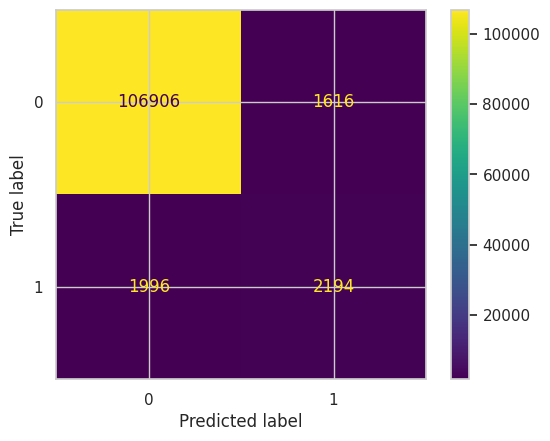

AUC score: 0.9274881078411825


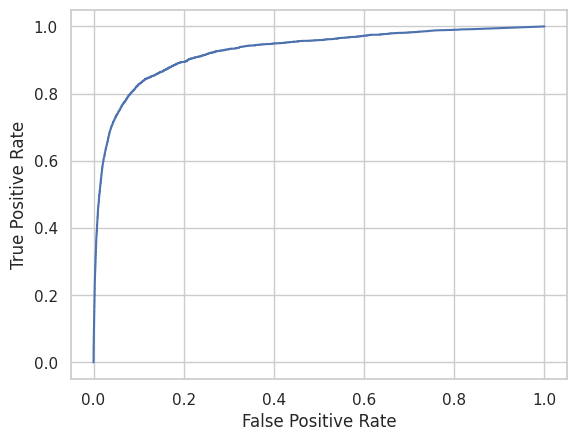

AUPRC score: 0.5407336488736196


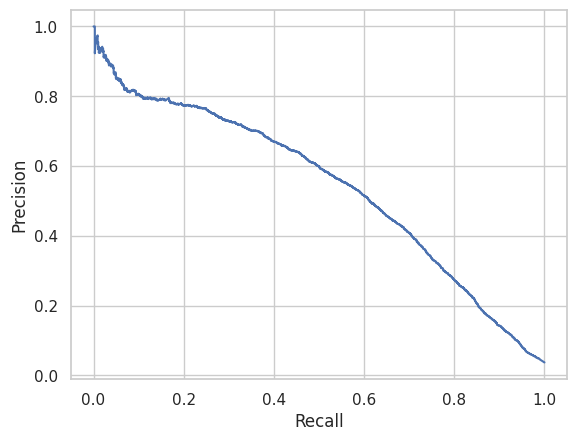

[0.7787623065087149,
 0.7543683475594117,
 0.765943649275149,
 0.9679537227624387,
 0.9274881078411825,
 0.5407336488736196]

In [36]:
y_pred = model_time_seri.predict(X_test_time_seri)
calculate_metrics(y_test_time_seri, y_pred, is_prob=True)